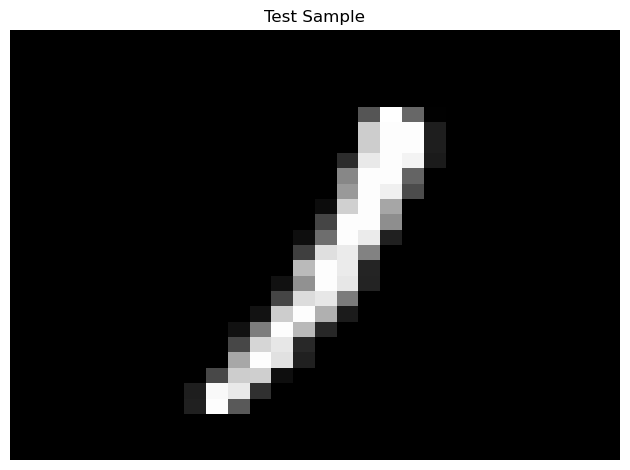

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  85 255 103   1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 205 253 253  30   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 205 253 253  30
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  44 233 253 244  27   0   0   

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Function to read MNIST data from CSV filey
def read_mnist_csv(filename):
    return pd.read_csv(filename, header=None).values[:, 1:]  # Exclude the label column

# Path to the MNIST dataset
data_path = "mnist_dataset"

# Read MNIST train and test images from CSV files
train_images = read_mnist_csv(os.path.join(data_path, 'mnist_train.csv'))
test_images = read_mnist_csv(os.path.join(data_path, 'mnist_test.csv'))

"""
print(train_images.shape) = (60000, 784)

"""

Test_sample = train_images[99]

# image show Test_sample
plt.imshow(Test_sample.reshape(-28, 28), cmap='gray', aspect = 'auto')
plt.title(f'Test Sample')
plt.axis('off')
plt.tight_layout()
plt.show()

print(Test_sample)

In [104]:
# count the number of non-zero entries in Test_sample
print(np.count_nonzero(Test_sample))

84


In [105]:
def generate_random_matrix(M, n_cols):
    while True:
        # Initialize an empty matrix
        matrix = np.zeros((M, n_cols))

        # Generate random values for each column
        for i in range(n_cols):
            # Generate a random column
            column = np.random.normal(loc=0, scale=1/np.sqrt(M), size=(M,))
            
            # Ensure the column is linearly independent from previous columns
            for j in range(i):
                # Subtract the projection of the new column onto previous columns
                column -= np.dot(matrix[:, j], column) * matrix[:, j]

            # Normalize the column to ensure its L2 norm is 1
            column /= np.linalg.norm(column)

            # Set the column in the matrix
            matrix[:, i] = column
        
        # Check if the rank condition is satisfied
        if np.linalg.matrix_rank(matrix) == M:
            break
    
    return matrix

In [106]:
def IHT(A, y, s, tol):
    z = np.zeros(A.shape[1])  # Initialize the sparse vector z
    r = y  # Initialize the residual vector r
    n = 0  # Initialize iteration count
    
    while np.linalg.norm(r) > tol and n < 5000:  # Add a maximum iteration count to avoid infinite loop
        # Update the approximation x
        x = z + np.dot(A.T, y - np.dot(A, z))
        
        # Apply the hard thresholding operator to x
        indices = np.argsort(np.abs(x))[-s:]  # Indices of the s largest absolute entries
        z = np.zeros_like(x)  # Reset z to zeros
        z[indices] = x[indices]  # Set the s largest entries of x to z
        
        # Update the residual vector
        r = y - np.dot(A, z)
        
        n += 1  # Increment iteration count

    return z

/var/folders/77/2m8y7_gs1fd5t207n01qz35c0000gn/T/ipykernel_78193/893863266.py:8: RuntimeWarning: invalid value encountered in add
  x = z + np.dot(A.T, y - np.dot(A, z))


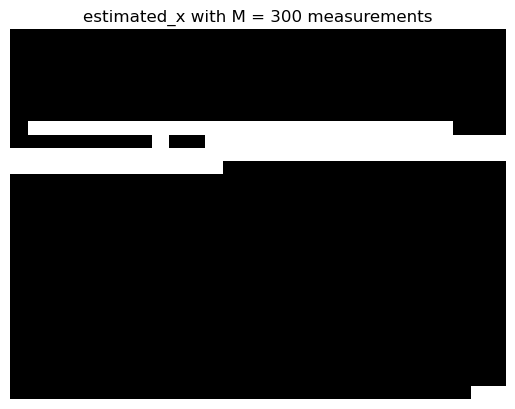

In [107]:
np.random.seed(42)  # set the random seed
M = 300 # number of measurements
A = generate_random_matrix(M, 784)

y = np.dot(A, Test_sample)
estimated_x = IHT(A, y, 84, 1e-8)

# reshape estimated_x to 28x28 image
plt.imshow(estimated_x.reshape(-28, 28), cmap='gray', aspect='auto')
plt.title(f'estimated_x with M = {M} measurements')
plt.axis('off')
plt.show()


In [108]:

# count the number of non-zero entries in Test_sample
print(np.count_nonzero(estimated_x))
print(estimated_x)

84
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. nan  0.
  0. nan nan nan nan nan nan nan nan nan nan nan

In [109]:
# Number of measurements
M = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]
MSE = []
for i in range(len(M)):  # Fix: Access the elements of the list M using the index i
    A = generate_random_matrix(M[i], 784)
    y = np.dot(A, Test_sample)
    estimated_x = IHT(A, y, 84, 1e-8)
    diff = Test_sample - estimated_x
    diff = diff / 255  # Normalize the difference vector
    MSE.append(np.linalg.norm(diff))
    print(i)

/var/folders/77/2m8y7_gs1fd5t207n01qz35c0000gn/T/ipykernel_78193/893863266.py:8: RuntimeWarning: invalid value encountered in add
  x = z + np.dot(A.T, y - np.dot(A, z))


0
1
2
3
4
5
6
7
8
9
10


In [110]:
print(MSE)

[nan, inf, inf, inf, 3.2771840328066884e-11, 2.715898260507122e-11, 3.089310122094769e-11, 3.363602906946923e-11, 2.2229152262202356e-11, 2.942964146723674e-11, 4.533457593003087e-16]


0
1
2
3


/var/folders/77/2m8y7_gs1fd5t207n01qz35c0000gn/T/ipykernel_78193/893863266.py:8: RuntimeWarning: invalid value encountered in add
  x = z + np.dot(A.T, y - np.dot(A, z))


4
5
6
7
8
9
10
11


/Users/kevingao/anaconda3/lib/python3.11/site-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in scalar subtract
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/Users/kevingao/anaconda3/lib/python3.11/site-packages/matplotlib/image.py:463: RuntimeWarning: invalid value encountered in scalar subtract
  newmin = vmid - dv * fact


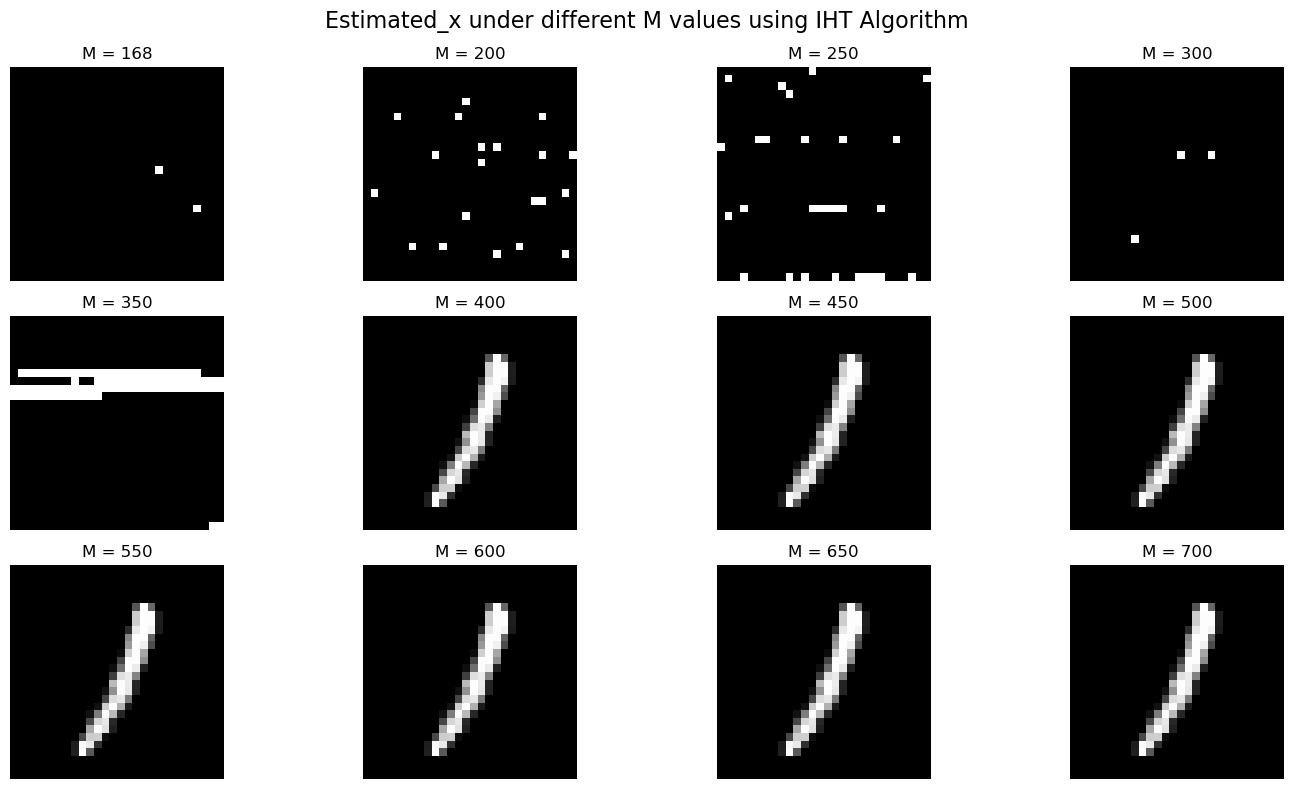

In [111]:
# Number of measurements
M = [168, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]
MSE = []
Recovered_x = []
for i in range(len(M)):  
    A = generate_random_matrix(M[i], 784)
    y = np.dot(A, Test_sample)
    estimated_x = IHT(A, y, 84, 1e-8)
    Recovered_x.append(estimated_x)
    diff = Test_sample - estimated_x
    MSE.append(np.linalg.norm(diff))
    print(i)

# Reshape estimated_x to 28x28 image and plot
plt.figure(figsize=(15, 8))
for i in range(len(M)):
    
    plt.subplot(3, 4, i+1)
    plt.imshow(Recovered_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'M = {M[i]}')
    plt.axis('off')

plt.suptitle('Estimated_x under different M values using IHT Algorithm', fontsize=16)
plt.tight_layout()
plt.show()